# El método del codo y el factor de la silueta del clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_samples, silhouette_score

In [3]:
x1 = np.array([3,1,1,2,1,6,6,6,5,6,7,8,9,8,9,9,8])
x2 = np.array([5,4,5,6,5,8,6,7,6,7,1,2,1,2,3,2,3])
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)

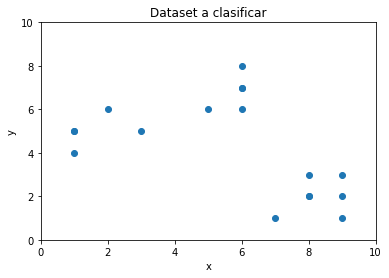

In [4]:
plt.plot()
plt.xlim([0,10]) # el minimo menos 1 y el máximo más 1
plt.ylim([0,10])
plt.title('Dataset a clasificar')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x1, x2)

## Método de la silueta

In [14]:
max_k = 10 # maximo numero de iteraciones que llevaremos a cabo
K = range(1,max_k) # puedo empezar desde 2 para no hace un cluster solo
ssw = [] # suma de los cuadrados de las diferencias
color_palette = [plt.cm.Spectral(float(i)/max_k) for i in K]
centroid = [sum(X)/len(X) for i in K]
sst = sum(np.min(cdist(X, centroid, 'euclidean'), axis = 1)) # axis = 1 para que sea en filas

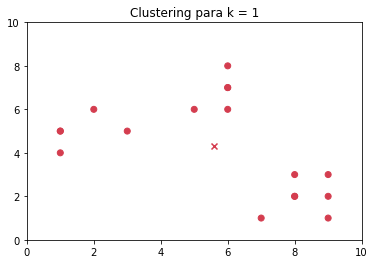

* para k = 2 el promedio de la silueta es de: 0.6113424368705715
   - Para i = 1 la silueta del cluster vale: 0.49704450958269375
   - Para i = 2 la silueta del cluster vale: 0.7746251901389686


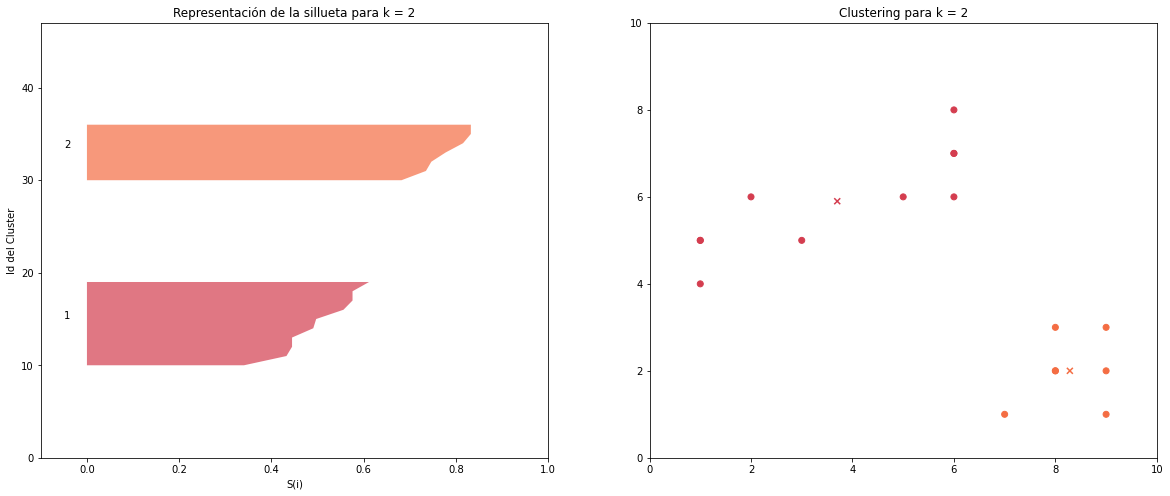

* para k = 3 el promedio de la silueta es de: 0.7122079383287169
   - Para i = 1 la silueta del cluster vale: 0.6609508863896014
   - Para i = 2 la silueta del cluster vale: 0.7345257364682265
   - Para i = 3 la silueta del cluster vale: 0.7322200728725188


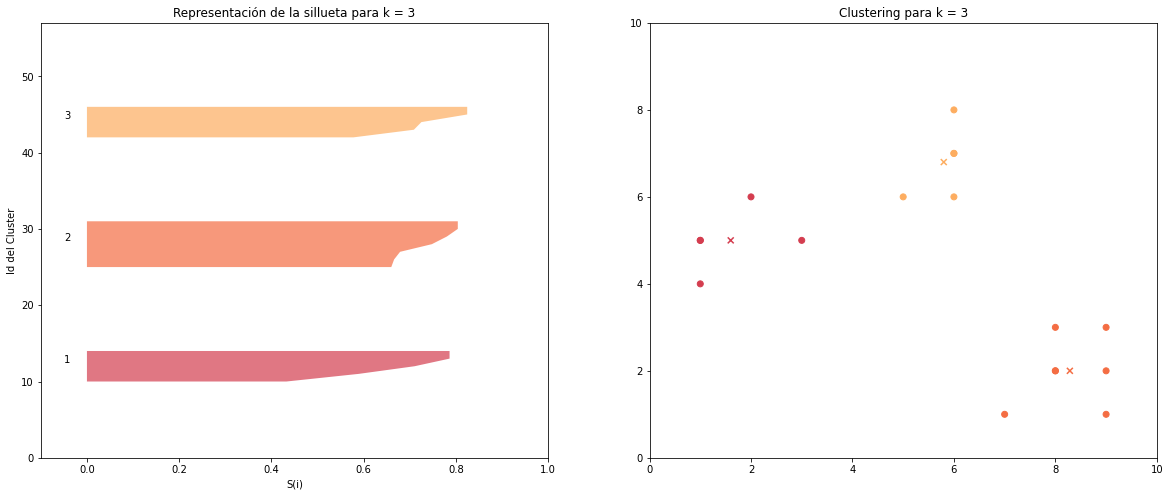

* para k = 4 el promedio de la silueta es de: 0.6389948643127632
   - Para i = 1 la silueta del cluster vale: 0.7345257364682265
   - Para i = 2 la silueta del cluster vale: 0.24096929517637128
   - Para i = 3 la silueta del cluster vale: 0.654458796162702
   - Para i = 4 la silueta del cluster vale: 0.655666655624379


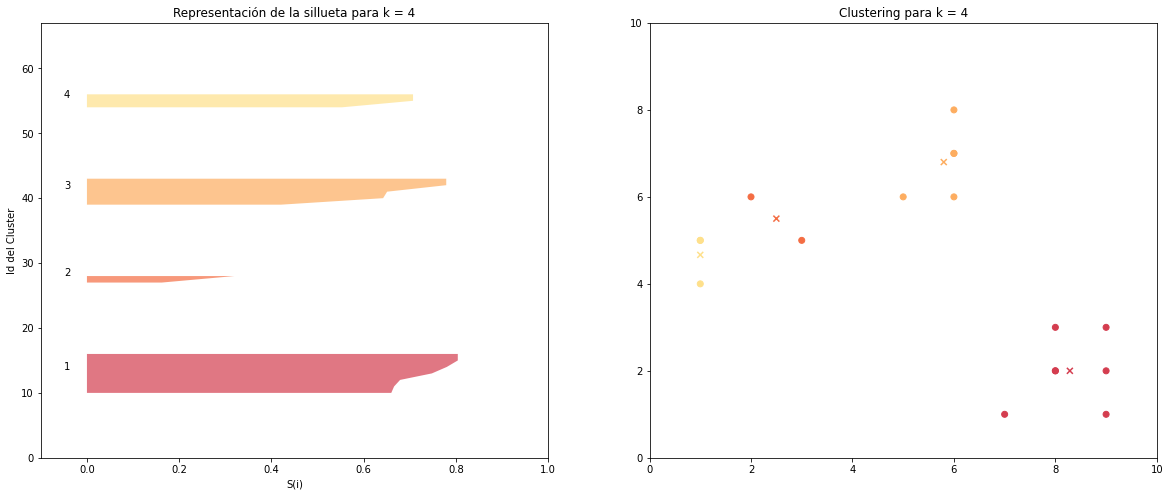

* para k = 5 el promedio de la silueta es de: 0.450456025779209
   - Para i = 1 la silueta del cluster vale: 0.654458796162702
   - Para i = 2 la silueta del cluster vale: -0.09040786759303471
   - Para i = 3 la silueta del cluster vale: 0.655666655624379
   - Para i = 4 la silueta del cluster vale: 0.42346712707864664
   - Para i = 5 la silueta del cluster vale: 0.24096929517637128


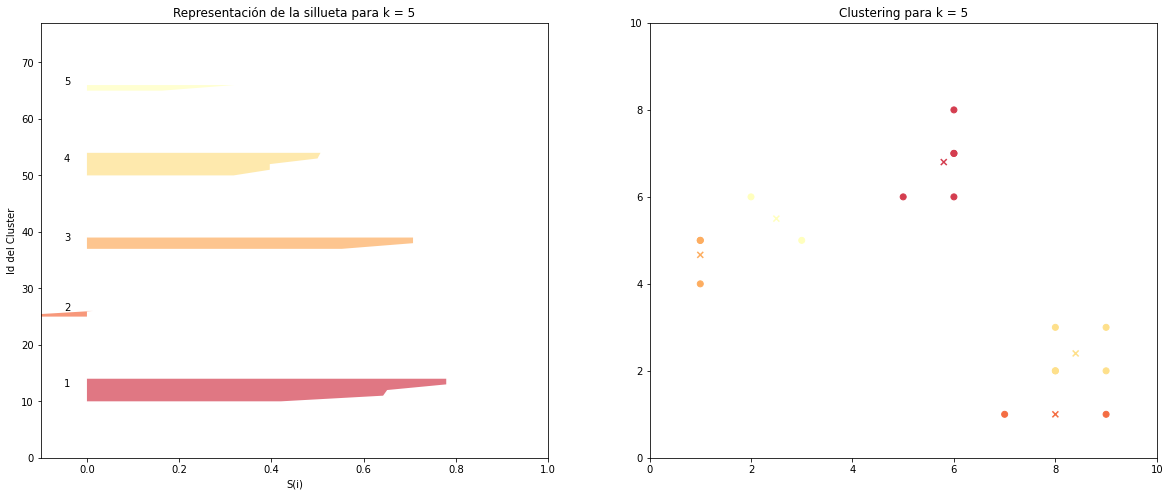

* para k = 6 el promedio de la silueta es de: 0.31338935895619663
   - Para i = 1 la silueta del cluster vale: 0.1899052168375926
   - Para i = 2 la silueta del cluster vale: 0.32882042637679976
   - Para i = 3 la silueta del cluster vale: 0.3503771888434877
   - Para i = 4 la silueta del cluster vale: 0.2698039021743969
   - Para i = 5 la silueta del cluster vale: 0.5664789734180768
   - Para i = 6 la silueta del cluster vale: 0.0


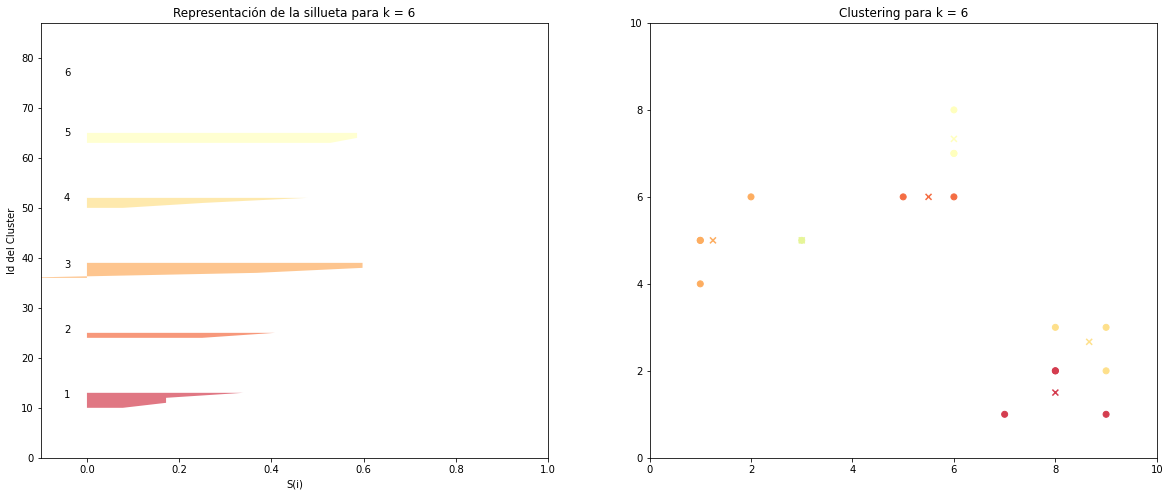

* para k = 7 el promedio de la silueta es de: 0.3883319447429514
   - Para i = 1 la silueta del cluster vale: 0.5664789734180768
   - Para i = 2 la silueta del cluster vale: 0.0
   - Para i = 3 la silueta del cluster vale: 0.655666655624379
   - Para i = 4 la silueta del cluster vale: 0.263812295212263
   - Para i = 5 la silueta del cluster vale: 0.31700053499298475
   - Para i = 6 la silueta del cluster vale: 0.32882042637679976
   - Para i = 7 la silueta del cluster vale: 0.24096929517637128


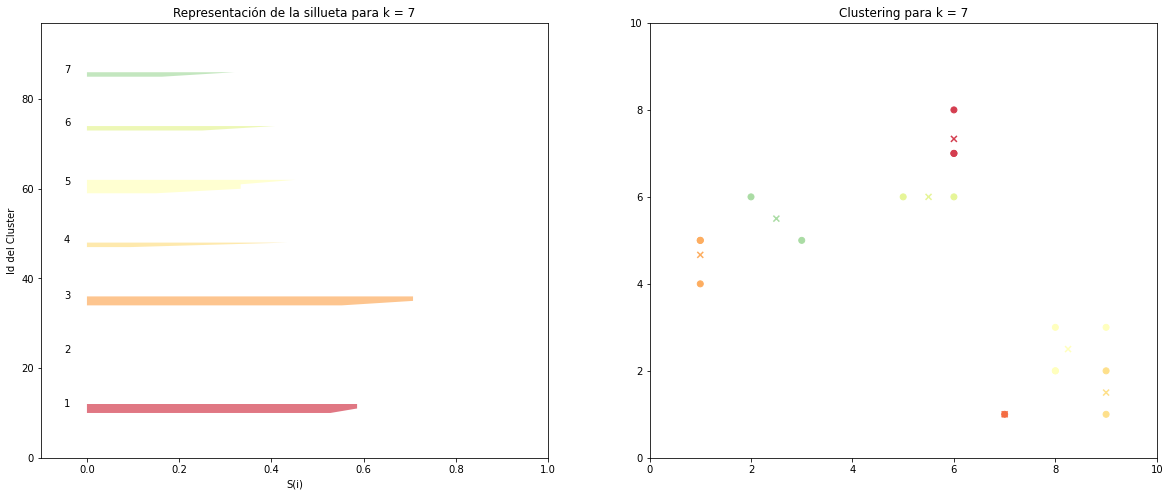

* para k = 8 el promedio de la silueta es de: 0.4348119275212126
   - Para i = 1 la silueta del cluster vale: 0.24096929517637128
   - Para i = 2 la silueta del cluster vale: 0.14644660940672627
   - Para i = 3 la silueta del cluster vale: 0.5664789734180768
   - Para i = 4 la silueta del cluster vale: 0.655666655624379
   - Para i = 5 la silueta del cluster vale: 0.14644660940672627
   - Para i = 6 la silueta del cluster vale: 0.32882042637679976
   - Para i = 7 la silueta del cluster vale: 1.0
   - Para i = 8 la silueta del cluster vale: 0.0


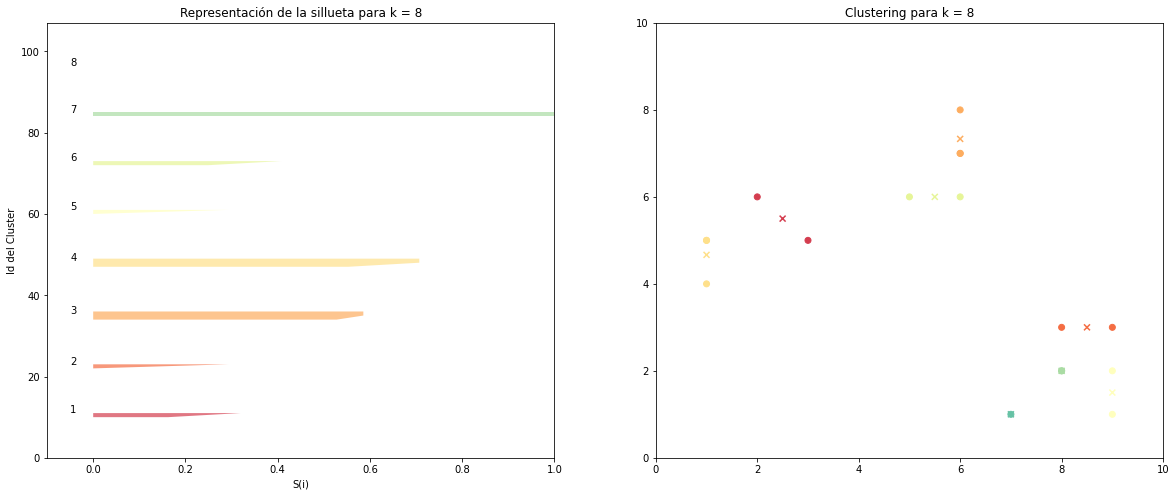

* para k = 9 el promedio de la silueta es de: 0.34011594848992555
   - Para i = 1 la silueta del cluster vale: 0.5664789734180768
   - Para i = 2 la silueta del cluster vale: 0.39052429175126996
   - Para i = 3 la silueta del cluster vale: 0.6152265411044983
   - Para i = 4 la silueta del cluster vale: 0.0
   - Para i = 5 la silueta del cluster vale: 0.32882042637679976
   - Para i = 6 la silueta del cluster vale: 0.0
   - Para i = 7 la silueta del cluster vale: 0.0
   - Para i = 8 la silueta del cluster vale: 0.0
   - Para i = 9 la silueta del cluster vale: 0.20382042637679978


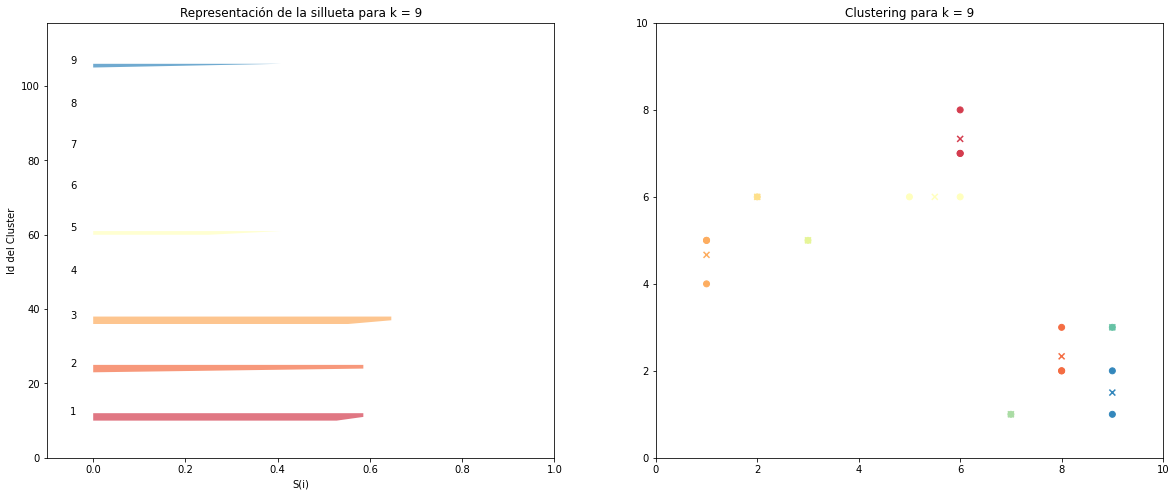

In [15]:
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    
    centers = pd.DataFrame(kmeanModel.cluster_centers_)
    labels = kmeanModel.labels_
    
    ssw_k = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis = 1))
    ssw.append(ssw_k)
    
    label_color = [color_palette[i] for i in labels]
    
    ## Fabricaremos una silueta para cada cluster
    # Por seguridad no hacemos silueta si k = 1 o k = len(X)
    if 1 < k < len(X):
        # Crear un subplot de una fila y dos columnas
        fig, (axis1, axis2) = plt.subplots(1,2)
        fig.set_size_inches(20,8)
        
        # El primer subplot contendrá la silueta que puede tener valores desde -1 a 1
        # En nuestro caso ya controlamos que los valores están entre -0.1 y 1
        axis1.set_xlim([-0.1, 1.0])
        # El número de clusters a insertar determinará el tamano de cada barra
        # El coeficiente (n_clusters + 1) * 10 será el espacio en blanco que dejaremos entre
        # siluetas individuales de cada cluster para separarlas
        axis1.set_ylim([0, len(X) + (k+1) * 10])
        
        silhouette_avg = silhouette_score(X, labels)
        print('* para k =', k, 'el promedio de la silueta es de:', silhouette_avg)
        sample_silhouette_values = silhouette_samples(X, labels)
        
        y_lower = 10
        for i in range(k):
            # Agregamos la silueta del cluster i-ésimo
            ith_cluster_sv = sample_silhouette_values[labels == i]
            print('   - Para i =', i+1, 'la silueta del cluster vale:', np.mean(ith_cluster_sv))
            # Ordenamos descendientemente las siluetas del cluster i-ésimo
            ith_cluster_sv.sort()
            
            #Calculamos donde colocar la primera silueta en el eje vertical
            ith_cluster_size = ith_cluster_sv.shape[0]
            y_upper = y_lower + ith_cluster_size
            
            #elegimos el color del cluster
            color = color_palette[i]
            
            axis1.fill_betweenx(np.arange(y_lower, y_upper), 
                              0, ith_cluster_sv, facecolor = color, alpha = 0.7)
            
            # Etiquetamos dicho cluster con el número en el centro
            axis1.text(-0.05, y_lower + 0.5 * ith_cluster_size, str(i+1))
            
            # Calculamos el nuevo y_lower para el siguiente cluster del gráfico
            y_lower = y_upper + 10 # dejamos vacías 10 posiciones sin muestra
            
        axis1.set_title('Representación de la sillueta para k = %s'%str(k))
        axis1.set_xlabel('S(i)')
        axis1.set_ylabel('Id del Cluster')
        
        # Fin de la representación de la silueta
    
    # Plot de los k-means con los puntos respectivos
    plt.plot()
    plt.xlim([0,10])
    plt.ylim([0,10])    
    plt.title('Clustering para k = %s'%str(k))
    plt.scatter(x1, x2, c=label_color)
    plt.scatter(centers[0], centers[1], c=color_palette[0:k], marker='x')
    plt.show()

Lo que hay que mirar en los promedios de cada i dentro de las siluetas es que estos sean parecidos. En este caso el k=3 es en el que todas las siluetas son similares (0.7345257364682265, 0.6609508863896014, 0.7322200728725188)

Creo que esos promedios se refieren a la distancia promedio que hay entre cada elementos del cluster y su varicentro.

**ChatGPT dice:**
Un valor más alto indica que los puntos están más cerca dentro del mismo cluster y más lejos de los puntos en otros clusters.

## Representación del codo

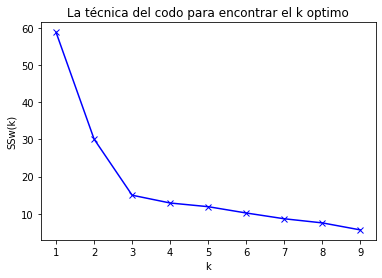

In [13]:
plt.plot(K, ssw, 'bx-')
plt.xlabel('k')
plt.ylabel('SSw(k)')
plt.title('La técnica del codo para encontrar el k optimo')
plt.show()

El codo también cae en k = 3, lo cuál coincide con la técnica de la silueta

### Representación del codo normalizado

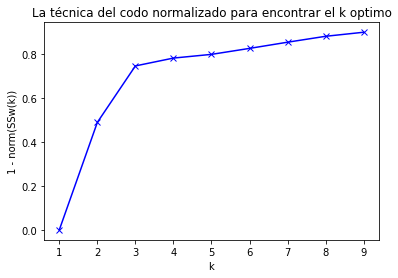

In [17]:
plt.plot(K, 1-ssw/sst, 'bx-')
plt.xlabel('k')
plt.ylabel('1 - norm(SSw(k))')
plt.title('La técnica del codo normalizado para encontrar el k optimo')
plt.show()

## Pautas para interpretar los valores del método de la silueta

El coeficiente de silueta es una medida de cuán similar es un objeto a su propio cluster (cohesión) en comparación con otros clusters (separación). El coeficiente de silueta oscila entre -1 y 1.

* Un valor cercano a 1 implica que el objeto está bien emparejado con su propio cluster y mal emparejado con los clusters vecinos. Si la mayoría de los objetos tienen un valor alto, entonces la configuración del cluster es apropiada.
* Un valor cercano a 0 indica que el objeto está en o muy cerca del límite de decisión entre dos clusters vecinos. Esto significa que el objeto podría asignarse razonablemente a cualquiera de los clusters.
* Un valor negativo indica que esos objetos podrían haber sido asignados al cluster incorrecto, ya que hay otro cluster que podría ser más similar.

Para interpretar los valores de las siluetas, puedes seguir estas pautas:

* Valores cercanos a +1 indican que la muestra está lejos de los clusters vecinos. Un valor de +1 indica que la muestra está muy lejos de los clusters vecinos.
* Un valor de 0 indica que la muestra está en o muy cerca del límite de decisión entre dos clusters vecinos.
* Valores negativos indican que esas muestras podrían haber sido asignadas al cluster incorrecto.

Por lo tanto, idealmente, quieres que los valores de la silueta estén lo más cerca posible de +1, y que los valores negativos sean mínimos, ya que esto indica que el clustering se ha realizado de manera efectiva.

## Pautas para interpretar los valores del método del codo

El método del codo es una técnica muy útil para determinar el número óptimo de clusters k en un algoritmo de agrupamiento, como el k-means. El método del codo busca el valor de k donde la adición de otro cluster no proporciona mucha mejor modelización de los datos.

Para entender cómo se lee el resultado del método del codo, primero se necesita entender qué se está graficando:

* El eje x representa el número de clusters (k).
* El eje y representa la suma de las distancias al cuadrado de cada punto a su centroide más cercano, a veces llamada "suma de los errores cuadrados" (SSE, por sus siglas en inglés).

La idea es que a medida que aumentas el número de clusters, la SSE disminuirá porque los puntos estarán más cerca de sus respectivos centroides. Sin embargo, en algún momento, añadir más clusters no hará que la SSE disminuya significativamente. Este punto es el "codo" en la gráfica, y es lo que generalmente se toma como el número óptimo de clusters.

En la gráfica, buscas un punto donde la curva se doble, similar a un codo. Antes de ese punto, añadir otro cluster tiende a reducir significativamente la SSE. Después de ese punto, añadir más clusters no reduce la SSE de manera significativa.

Por lo tanto, el número de clusters que elijas es el valor de k en el "codo". Sin embargo, este método es más una guía que una regla estricta, y puede haber casos en los que la elección del número de clusters no sea clara o esté sujeta a interpretación.